# Unitary of qlasskit function

In qlasskit, we can exploit external low-level frameworks to perform operations on the resulting quantum circuit. In this example, we use qiskit in order to obtain the unitary matrix of our `QlassF` function.


QlassF<f>(a:bool, b:bool) -> bool:
	_ret = a ^ ~b



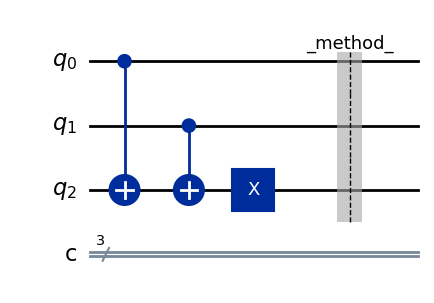

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex
from qlasskit import qlassf


@qlassf
def f(a: bool, b: bool) -> bool:
    return a ^ (not b)


print(f"\n{f}\n")

qc = QuantumCircuit(f.num_qubits, f.num_qubits)
qc.append(f.gate(), f.qubits)

qc.save_state()
qc.decompose().draw("mpl")

In [2]:
simulator = AerSimulator(method="unitary")
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
array_to_latex(result.get_unitary(circ, 3), max_size=16)

<IPython.core.display.Latex object>